In [ ]:
#importing the libraries
library(ggplot2) 
library(dplyr)  
library(tidyverse)

In [ ]:
install.packages("palmerpenguins") # You only need to do this once
library(palmerpenguins)
data("penguins")
penguins = na.omit(penguins) # Removes missing rows
my.student.number = 210431117 # Replace this with your student number
set.seed(my.student.number)
my.penguins = penguins[sample(nrow(penguins), 100), ]
my.penguins

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,38.6,17.0,188,2900,female,2009
Chinstrap,Dream,46.9,16.6,192,2700,female,2008
Chinstrap,Dream,42.5,17.3,187,3350,female,2009
Chinstrap,Dream,45.7,17.3,193,3600,female,2009
Chinstrap,Dream,43.5,18.1,202,3400,female,2009
Adelie,Biscoe,34.5,18.1,187,2900,female,2008
Adelie,Dream,38.8,20.0,190,3950,male,2007
Gentoo,Biscoe,45.0,15.4,220,5050,male,2008
Gentoo,Biscoe,48.7,14.1,210,4450,female,2007


`summarise()` has grouped output by 'species'. You can override using the `.groups` argument.



[1] "probability of males heavier than females:"


[1] 0.7840225

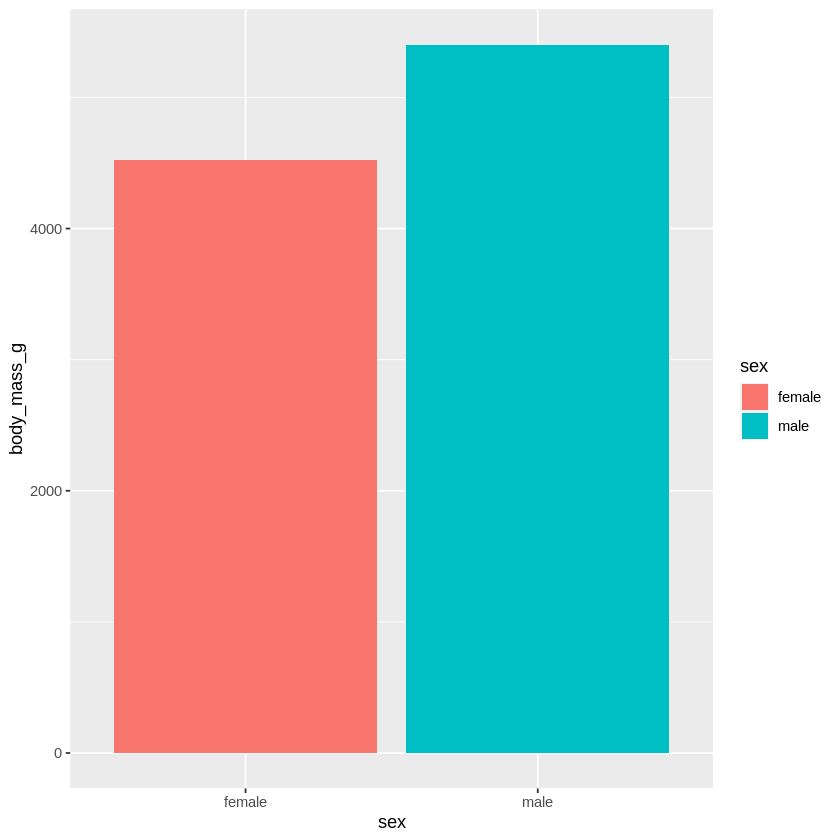

In [ ]:
penguins_sex= my.penguins %>%
  group_by(species,sex) %>%
  summarise(bill_depth_mm= mean(bill_depth_mm),           #summarising
            bill_length_mm= mean(bill_length_mm),         #on basis
            flipper_length_mm=mean(flipper_length_mm),    #of mean
            body_mass_g=mean(body_mass_g))
ggplot(penguins_sex, aes(x=sex, y=body_mass_g,fill=sex))+ #plotting the graph of weight by gender
  geom_col(position = position_dodge())

#splitting the dataset
my.penguins_male = my.penguins[my.penguins$sex == "male",] #male data set
my.penguins_female= my.penguins[my.penguins$sex == "female",] #female data set
#counter for comparison and calculating probability as if gone through vector space time complexity would be more
countGreaterWeightMale<-0  #counter of male penguins being heavier
countGreaterWeightFemale<-0 # counter for female penguins being heavier

# loop initiation for comparison
for (male in my.penguins_male$body_mass_g){ #outer loop for male 
  for (female in my.penguins_female$body_mass_g){ #nested loop for female as we have to consider all combinations
    if (male>=female){                #comparison between weights
      countGreaterWeightMale<- countGreaterWeightMale+1  #increaing counter if true
    }
    else{
      countGreaterWeightFemale<-countGreaterWeightFemale+1 #increasing counter if not true
    }

  }
}
#countGreaterWeightMale #total times male penguins are heavier than females
#countGreaterWeightFemale #total times female penguins are heavier than males
prob<- countGreaterWeightMale/(countGreaterWeightMale+countGreaterWeightFemale) #probability of males heavier than females.
print("probability of males heavier than females:")
prob

`summarise()` has grouped output by 'species'. You can override using the `.groups` argument.



[1] "probability of males having more bill depth than females:"


[1] 0.7133681

[1] "Total number of penguins having mbull depth more than 20 mm:"


[1] 8

[1] "greater than 5% of penguins have Bill depth greater than or equal to 20 mm"


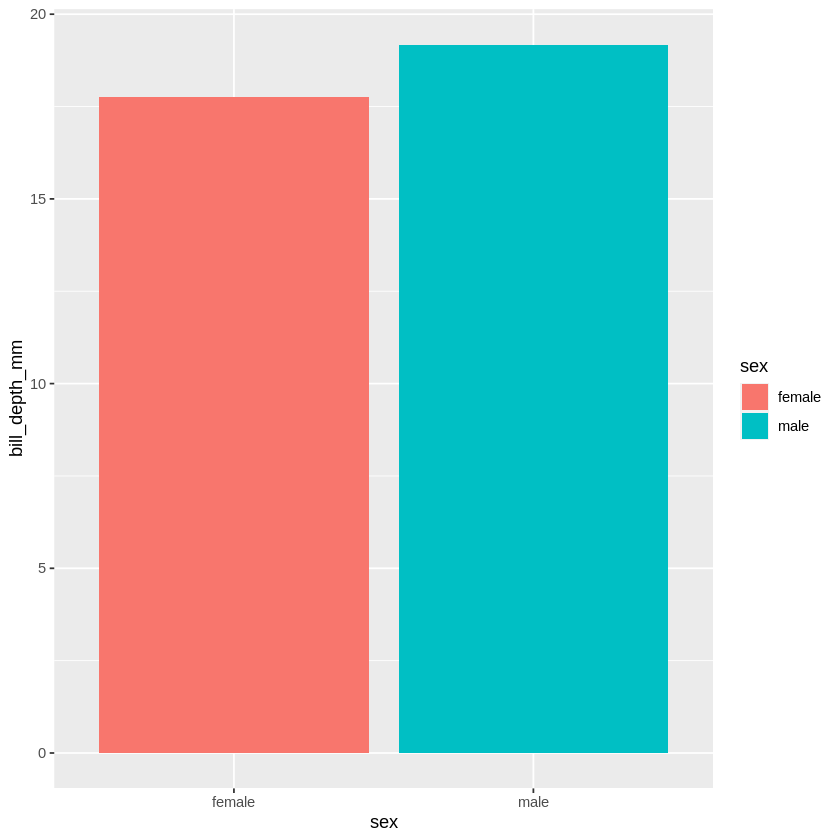

In [ ]:
penguins_bill_depth_by_sex= my.penguins %>%
  group_by(species,sex) %>%
  summarise(bill_depth_mm= mean(bill_depth_mm),           #summarising
            bill_length_mm= mean(bill_length_mm),         #on basis
            flipper_length_mm=mean(flipper_length_mm),    #of mean
            body_mass_g=mean(body_mass_g))
ggplot(penguins_bill_depth_by_sex, aes(x=sex, y=bill_depth_mm,fill=sex))+       #plotting bill depth with respect to gender
  geom_col(position = position_dodge())


#splitting the dataset
my.penguins_male = my.penguins[my.penguins$sex == "male",] #male data set
my.penguins_female= my.penguins[my.penguins$sex == "female",] #female data set
#counter for comparison and calculating probability as if gone through vector space time complexity would be more
countGreaterMale<-0  #counter of male penguins having more bill depth
countGreaterFemale<-0 # counter for female penguins having more bill depth

# loop initiation for comparison
for (male in my.penguins_male$bill_depth_mm){ #outer loop for male 
  for (female in my.penguins_female$bill_depth_mm){ #nested loop for female as we have to consider all combinations
    if (male>=female){                #comparison between bill depth
      countGreaterMale<- countGreaterMale+1  #increaing counter if true
    }
    else{
      countGreaterFemale<-countGreaterFemale+1 #increasing counter if not true
    }

  }
}
#countGreaterMale #total times male penguins having more bill depth
#countGreaterFemale #total times female penguins having more bill depth
probmale<- countGreaterMale/(countGreaterMale+countGreaterFemale) #probability of males having more bill depth than females.
print("probability of males having more bill depth than females:")
probmale


#observing how many penguins have bill depth more than 20 mm
countBillDepth=0
for (i in my.penguins$bill_depth_mm){ #iterating through bill depth
  if(i>= 20){
    countBillDepth<-countBillDepth+1   #increasing the vounter of bill depth
  }
}
print("Total number of penguins having mbull depth more than 20 mm:")
countBillDepth
if(countBillDepth<5){
  print("less than 5% of penguins have Bill depth greater than or equal to 20 mm ")} # to check if it is less than 5 %
if(countBillDepth>=5){
  print("greater than 5% of penguins have Bill depth greater than or equal to 20 mm") #to check if it is more than 5%
}

`summarise()` has grouped output by 'species'. You can override using the `.groups` argument.



[1] "Probability of males having more bill length than females."


[1] 0.681654

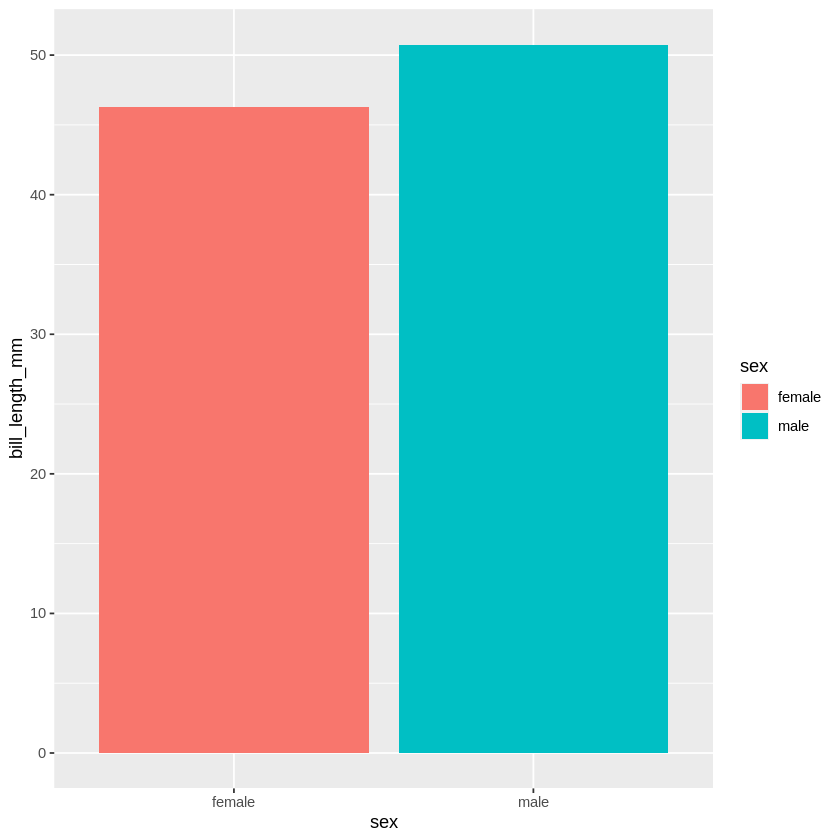

In [ ]:
penguins_bill_length_by_sex= my.penguins %>%
  group_by(species,sex) %>%
  summarise(bill_depth_mm= mean(bill_depth_mm),           #summarising
            bill_length_mm= mean(bill_length_mm),         #on basis
            flipper_length_mm=mean(flipper_length_mm),    #of mean
            body_mass_g=mean(body_mass_g))
ggplot(penguins_bill_length_by_sex, aes(x=sex, y=bill_length_mm,fill=sex))+   #plotting bill length with respect to gender/sex
  geom_col(position = position_dodge())





#splitting the dataset
my.penguins_male = my.penguins[my.penguins$sex == "male",] #male data set
my.penguins_female= my.penguins[my.penguins$sex == "female",] #female data set
#counter for comparison and calculating probability as if gone through vector space time complexity would be more
countGreaterMale<-0  #counter of male penguins having more bill length
countGreaterFemale<-0 # counter for female penguins having more bill length

# loop initiation for comparison
for (male in my.penguins_male$bill_length_mm){ #outer loop for male 
  for (female in my.penguins_female$bill_length_mm){ #nested loop for female as we have to consider all combinations
    if (male>=female){                #comparison between bill length
      countGreaterMale<- countGreaterMale+1  #increaing counter if true
    }
    else{
      countGreaterFemale<-countGreaterFemale+1 #increasing counter if not true
    }

  }
}
#countGreaterMale #total times male penguins having more bill length
#countGreaterFemale #total times female penguins having more bill length
probmale<- countGreaterMale/(countGreaterMale+countGreaterFemale) #probability of males having more bill length than females.
print("Probability of males having more bill length than females.")
probmale

`summarise()` has grouped output by 'species'. You can override using the `.groups` argument.



[1] "probability of males having more flipper length than female:"


[1] 0.6712164

[1] "null hypotheis that penguin's flippers are 200mm in length on average:"
[1] "mean:"


[1] 203.1277

[1] "Variance:"


[1] 204.766

[1] "length of the dataset of male:"


[1] 47

[1] "T value:"


[1] 1.498441

[1] "P value:"


[1] 0.9295747

[1] "As the p value is greater than 0.05. the hypothesis stands true"


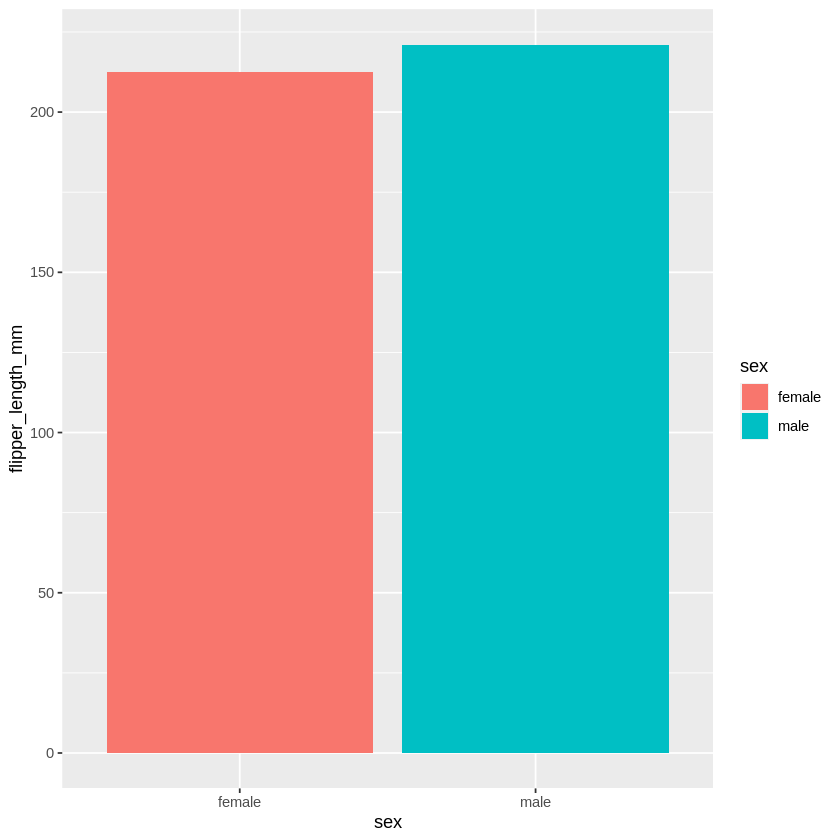

In [ ]:
penguins_flipper_length_by_sex= my.penguins %>%
  group_by(species,sex) %>%
  summarise(bill_depth_mm= mean(bill_depth_mm),           #summarising
            bill_length_mm= mean(bill_length_mm),         #on basis
            flipper_length_mm=mean(flipper_length_mm),    #of mean
            body_mass_g=mean(body_mass_g))
ggplot(penguins_flipper_length_by_sex, aes(x=sex, y=flipper_length_mm,fill=sex))+   #plotting flipper length with respect to sex
  geom_col(position = position_dodge())


#splitting the dataset
my.penguins_male = my.penguins[my.penguins$sex == "male",] #male data set
my.penguins_female= my.penguins[my.penguins$sex == "female",] #female data set
#counter for comparison and calculating probability as if gone through vector space time complexity would be more
countGreaterMale<-0  #counter of male penguins having more flipper length
countGreaterFemale<-0 # counter for female penguins having more flipper length

# loop initiation for comparison
for (male in my.penguins_male$flipper_length_mm){ #outer loop for male 
  for (female in my.penguins_female$flipper_length_mm){ #nested loop for female as we have to consider all combinations
    if (male>=female){                #comparison between flipper length
      countGreaterMale<- countGreaterMale+1  #increaing counter if true
    }
    else{
      countGreaterFemale<-countGreaterFemale+1 #increasing counter if not true
    }

  }
}
#countGreaterMale #total times male penguins having more flipper length
#countGreaterFemale #total times female penguins having more flipper length
probmale<- countGreaterMale/(countGreaterMale+countGreaterFemale) #probability of males having more flipper length than females.
print("probability of males having more flipper length than female:")
probmale

#answer2
print("null hypotheis that penguin's flippers are 200mm in length on average:")
my.penguins_male = my.penguins[my.penguins$sex == "male",] #male data set
meanFlipperLength_Male= mean(my.penguins_male$flipper_length_mm) #mean of the flipper length
print("mean:") #printing the value
meanFlipperLength_Male
varianceFlipperLength_Male=var(my.penguins_male$flipper_length_mm) #variance of the flipper length 
print("Variance:")
varianceFlipperLength_Male
length_male=length(my.penguins_male$flipper_length_mm) #total no. of male penguins
print("length of the dataset of male:")
length_male
Tvalue_male<-(meanFlipperLength_Male-200)/(sqrt(varianceFlipperLength_Male/length_male)) #t value of the null hypothesis
print("T value:")
Tvalue_male
Pvalue_male<-pt(Tvalue_male,(length_male-1)) #pvalue of the null hypothesis
print("P value:")
Pvalue_male
print("As the p value is greater than 0.05. the hypothesis stands true")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



[1] "To confirm wih graph if Gentoo penguins are really heavier than 5000 kg on average let's assume a hypothesis that they are and calculate the null hypothesis"
[1] "mean:"


[1] 4947.581

[1] "Variance:"


[1] 301431.5

[1] "length:"


[1] 31

[1] "T value:"


[1] -0.5315918

[1] "P value:"


[1] 0.2994617

[1] "As their is no evidence against our approximation, hence we can accept the hypothesis"


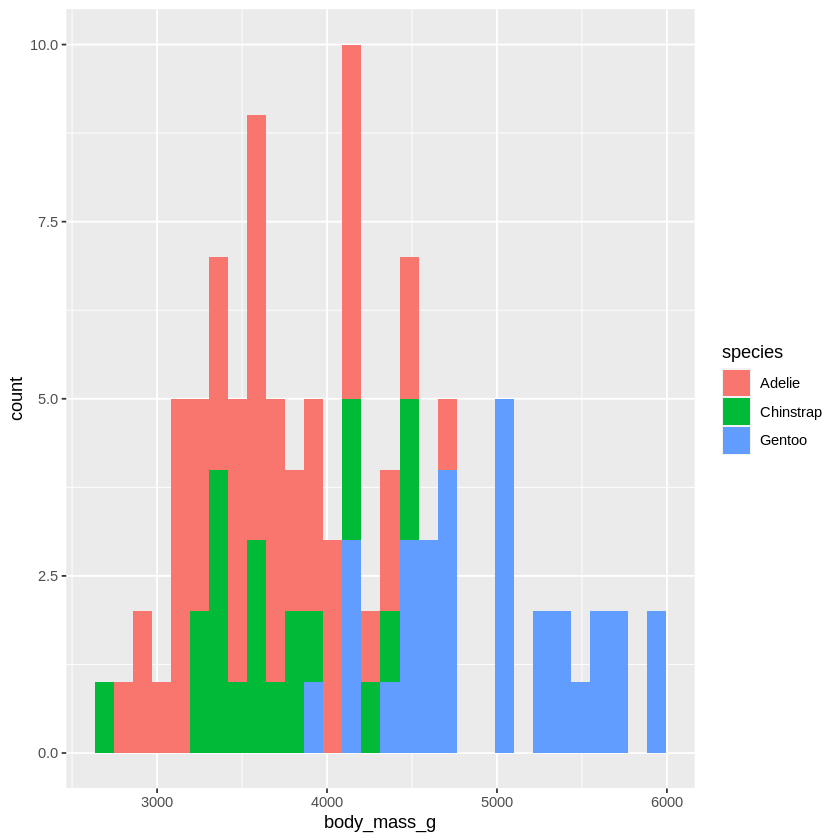

In [ ]:
ggplot(my.penguins, aes(x=body_mass_g, fill = species)) +         #exploratory all species plot
 geom_histogram()


print("To confirm wih graph if Gentoo penguins are really heavier than 5000 kg on average. let's assume a hypothesis that they are and calculate the null hypothesis")
my.penguins_Gentoo = my.penguins[my.penguins$species == "Gentoo",] #considering only species of gentoo
meanweight_Gentoo=mean(my.penguins_Gentoo$body_mass_g)             #taking the mean of weight of just gentoo species 
print("mean:")  
meanweight_Gentoo
variance_Gentoo=var(my.penguins_Gentoo$body_mass_g)                 #taking the variance of weight of just gentoo species
print("Variance:")
variance_Gentoo
length_Gentoo=length(my.penguins_Gentoo$body_mass_g)                 #taking the length of weight of just gentoo species
print("length:")
length_Gentoo
Tvalue_Gentoo<-(meanweight_Gentoo-5000)/(sqrt(variance_Gentoo/length_Gentoo))     #taking the tvalue of  gentoo species at 5000gm
print("T value:")
Tvalue_Gentoo
Pvalue_Gentoo=pt(Tvalue_Gentoo,(length_Gentoo-1))                     #taking the p value gentoo species at 5000 gm             
print("P value:")
Pvalue_Gentoo
if(Pvalue_Gentoo>0.05){
  print("As their is no evidence against our approximation, hence we can accept the hypothesis") #to conclude our hypotheis was true, and majority of penguins weigh more tan 5000 kg
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



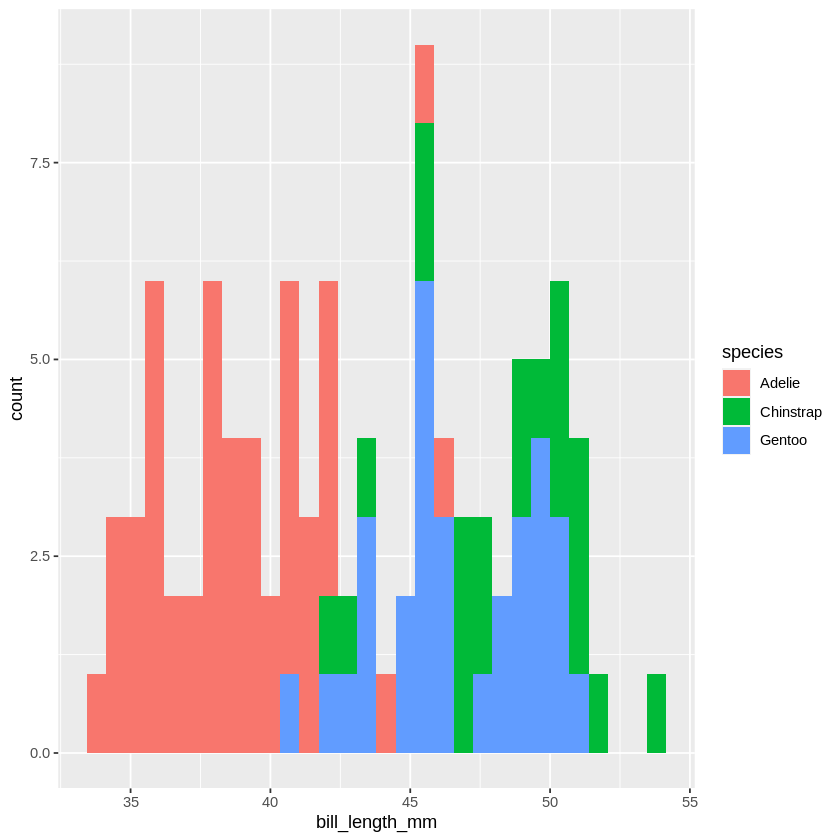

In [ ]:
ggplot(my.penguins, aes(x=bill_length_mm , fill = species)) +     #exploratory all species plot with respect to bill length
 geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



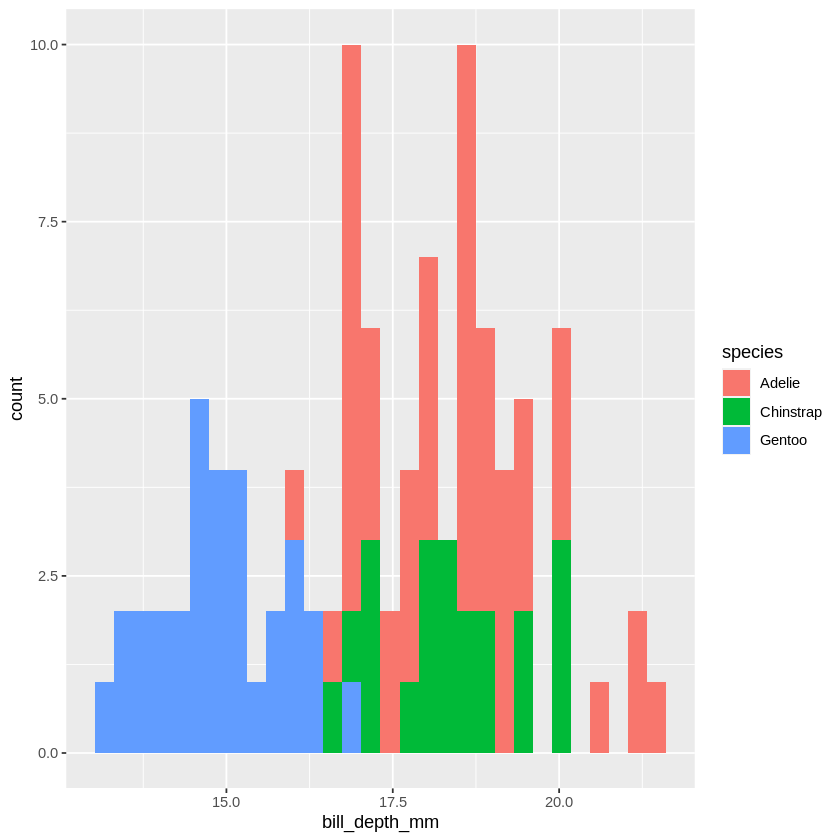

In [ ]:
ggplot(my.penguins, aes(x=bill_depth_mm, fill = species)) +         #exploratory all species plot with respect to bill depth
 geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



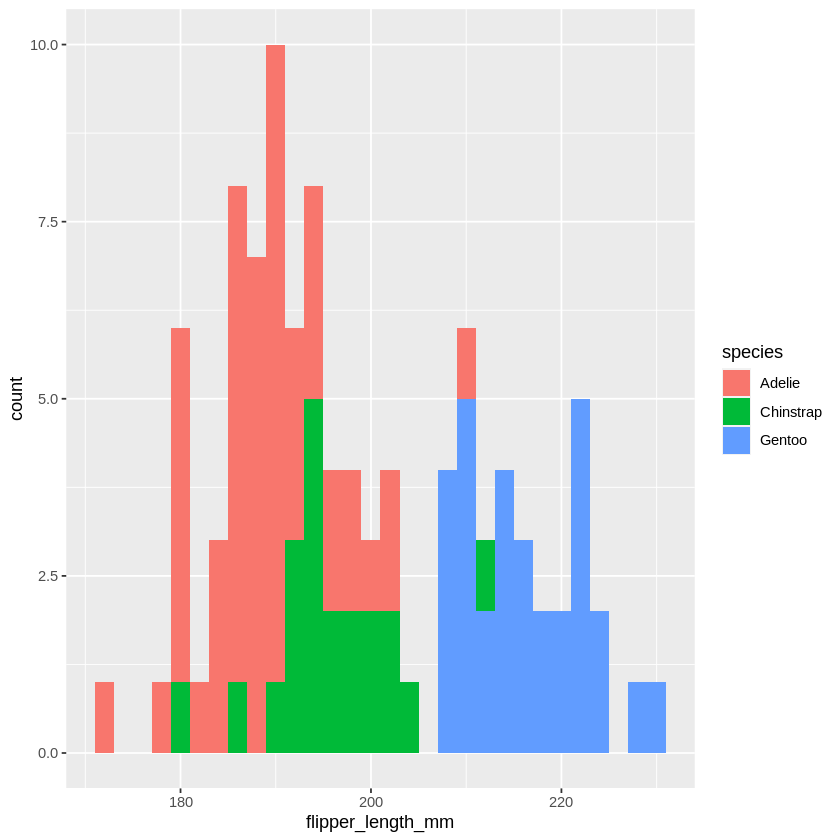

In [ ]:
ggplot(my.penguins, aes(x=flipper_length_mm, fill = species)) + #exploratory all species plot with respect to flipper length
 geom_histogram()

`summarise()` has grouped output by 'species'. You can override using the `.groups` argument.



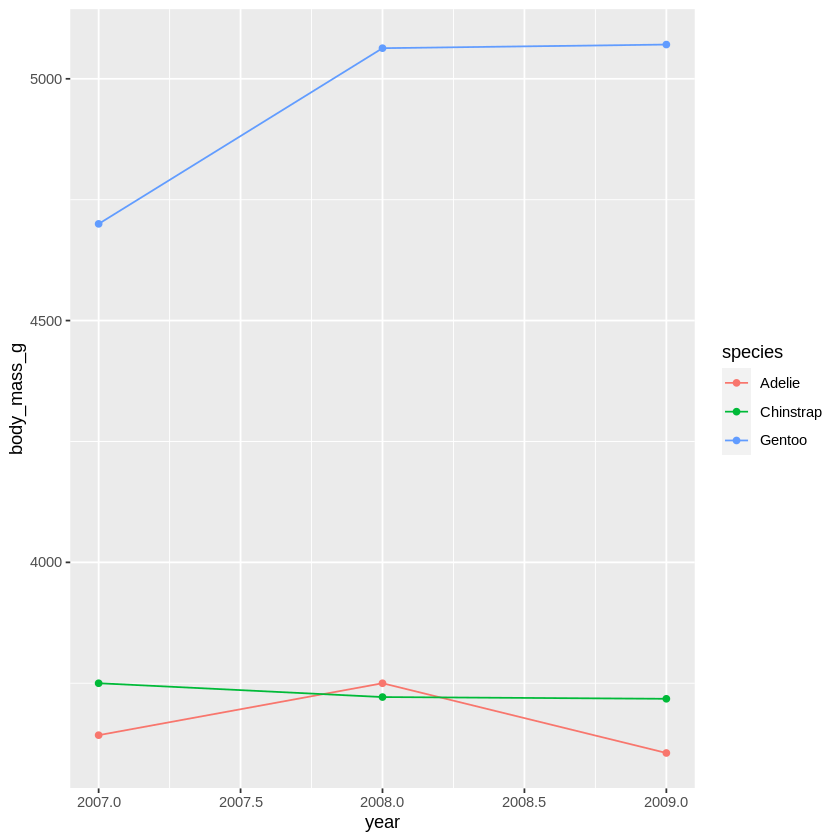

In [ ]:
penguins_by_year= my.penguins %>%
  group_by(species, year)%>%              #exploratory data analysis 
  summarise(body_mass_g=mean(body_mass_g))

ggplot(penguins_by_year, aes(x=year, y=body_mass_g, color=species))+              #plot of body mass with respect to year
 geom_line()+
 geom_point()